# 🏘️ Prédiction des prix d'appartements - Machine Learning


## 📌 Objectif du projet

L’objectif est de prédire le **prix de vente d’un appartement** à partir de plusieurs caractéristiques (surface, nombre de pièces, ville, etc.).
Nous allons suivre les étapes classiques d’un projet de machine learning :
- Analyse exploratoire (EDA)
- Nettoyage et transformation des données
- Modélisation avec plusieurs algorithmes de régression
- Validation croisée
- Optimisation d'hyperparamètres
- Évaluation finale et sauvegarde du meilleur modèle


## 📦 Import des bibliothèques

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import joblib

# Analyse du jeu de donnee
# Chargement de la donnee

df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Immobilier\data\appartements-data-db.csv")
df.head(5)


,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


## 🔍 Analyse exploratoire des données (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


Analyse exploratoire des données (EDA) 
Comprendre la structure générale du jeu de données (types, dimensions, aperçus).

Identifier les valeurs manquantes et les doublons.

Analyser la distribution des variables numériques.

Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations.

​

In [6]:
# Valeurs nulles
print(df.isna().sum())

title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64


## 🔍 Analyse exploratoire des données (EDA)

In [7]:
# Evaluation des doublons
doublons = df[df.duplicated(subset = "link", keep = "first")]
doublons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 133 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         41 non-null     object 
 1   price         36 non-null     object 
 2   city_name     41 non-null     object 
 3   salon         41 non-null     float64
 4   nb_rooms      36 non-null     float64
 5   nb_baths      36 non-null     float64
 6   surface_area  41 non-null     float64
 7   equipment     36 non-null     object 
 8   link          41 non-null     object 
dtypes: float64(4), object(5)
memory usage: 3.2+ KB


## 🔍 Analyse exploratoire des données (EDA)

In [8]:
# Description des statistiques
df.describe() 

,salon,nb_rooms,nb_baths,surface_area
count,1620.000000,1490.000000,1480.000000,1742.000000
mean,1.267284,2.379195,2.307432,174.933410
std,0.557539,0.667159,7.629128,2969.500693
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,71.000000
50%,1.000000,2.000000,2.000000,89.000000
75%,1.000000,3.000000,2.000000,114.750000
max,8.000000,7.000000,134.000000,123456.000000


Analyser la distribution des variables numériques.

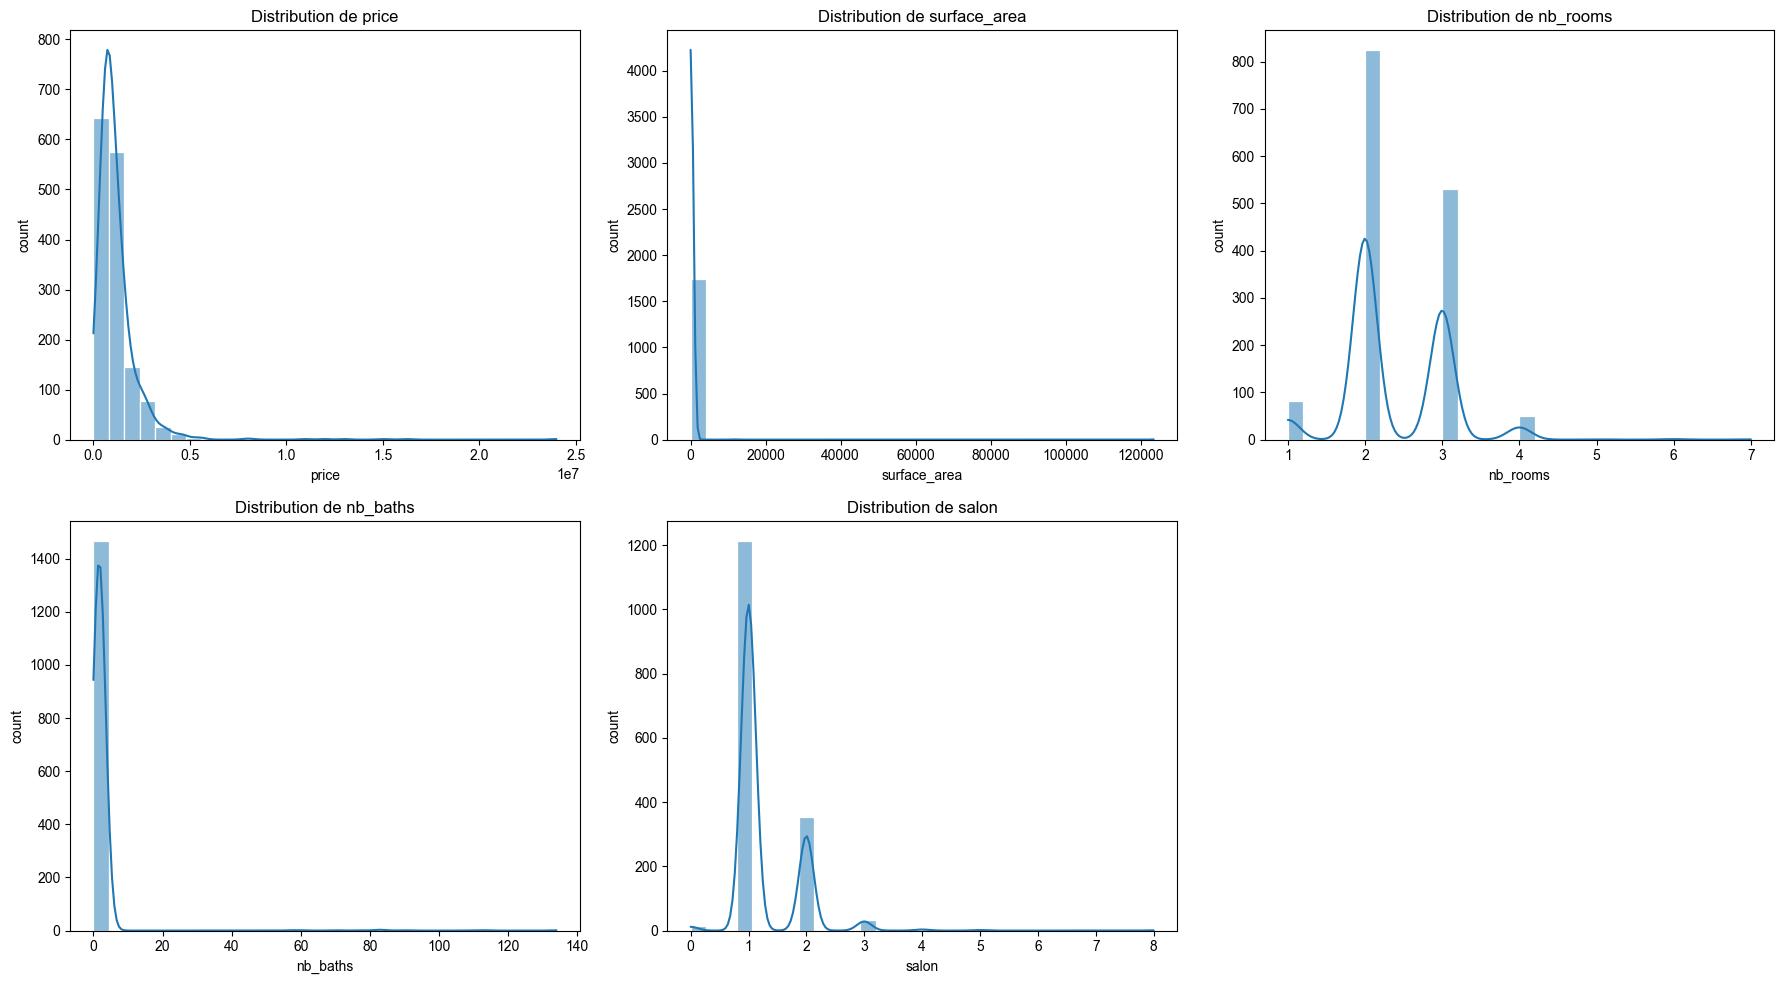

In [9]:
# Convertion de la colonne price en type numeric pour une meilleur utilisation de la donnee
df["price"] = df["price"].str.replace(r"\D", "", regex= True)
df["price"] = df["price"].replace("", np.nan)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Tableau des valeurs numeriques pour traitement
numeric_vars = ["price", "surface_area", "nb_rooms", "nb_baths", "salon"]

# Ceation d'un tableau de 6 cases
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize =(18,10))

# Remplacement du tablaeau 2d en 1d pour un parcours plus simple dans une boucle
axes = axes.flatten()

sns.set(style= "whitegrid")

for i , col in enumerate(numeric_vars):
    #   Creation des histogrammes
    sns.histplot(df[col], kde= True, ax= axes[i], bins= 30)
    #   Assignation du nom des Sous cases
    axes[i].set_title(f"Distribution de {col}")
    
    #   Assignation du nom des AXES
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("count")

#   Suppression de la derniere sous case vide car inutile
fig.delaxes(axes[-1])    
plt.tight_layout()

# Affichage des graphes crees
plt.show()


Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations.

In [10]:
#   Travaillons les valeurs numerique pour calculer la matrice de correlation 
correlation = df[["price", "surface_area", "nb_rooms", "nb_baths", "salon"]].corr()

#   Affichage de la matrice de correlation
correlation

,price,surface_area,nb_rooms,nb_baths,salon
price,1.000000,0.471631,0.261319,0.006025,0.226761
surface_area,0.471631,1.000000,0.618032,0.040730,-0.002076
nb_rooms,0.261319,0.618032,1.000000,0.047500,0.304830
nb_baths,0.006025,0.040730,0.047500,1.000000,0.020866
salon,0.226761,-0.002076,0.304830,0.020866,1.000000


Text(0.5, 1.0, 'Matrice de correlation')

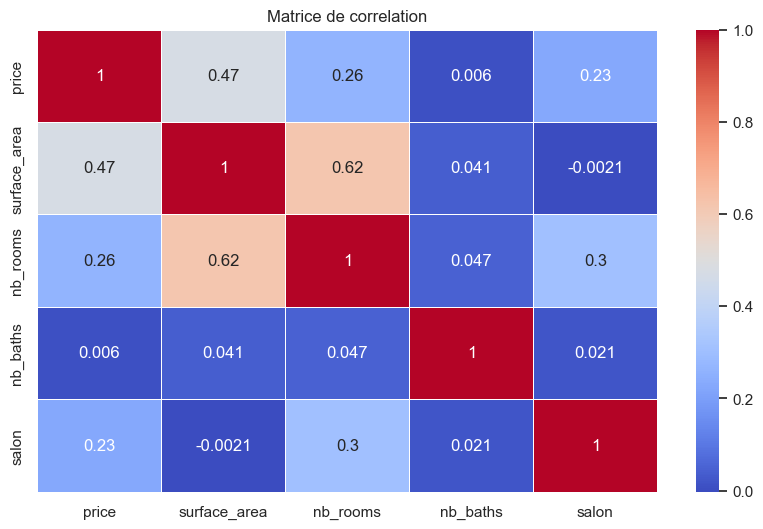

In [11]:

#   Visualisation de la figure
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot= True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de correlation")


## 🔄 Encodage des variables catégorielles

In [12]:
#   Extraction des équipements (equipment) dans des colonnes booléennes
print("Voici le tableau initial")
print(df["equipment"].head())

print("----------------------------------------------------------------------")

#   utilistion des dumies
dum = df["equipment"].str.get_dummies(sep= "/")
#   dummi = dum.astype(bool)
print("Voici le tableau final apres dumies")
print(dum.head())


Voici le tableau initial
0                    Ascenseur/Balcon/Parking/Terrasse
1    Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...
2    Ascenseur/Balcon/Chauffage/Climatisation/Conci...
3    Ascenseur/Chauffage/Climatisation/Cuisine Équi...
4          Ascenseur/Balcon/Concierge/Parking/Sécurité
Name: equipment, dtype: object
----------------------------------------------------------------------
Voici le tableau final apres dumies
   Ascenseur  Balcon  Chauffage  Climatisation  Concierge  Cuisine Équipée  \
0          1       1          0              0          0                0   
1          1       1          1              1          0                1   
2          1       1          1              1          1                1   
3          1       0          1              1          0                1   
4          1       1          0              0          1                0   

   Duplex  Meublé  Parking  Sécurité  Terrasse  
0       0       0        1         0        

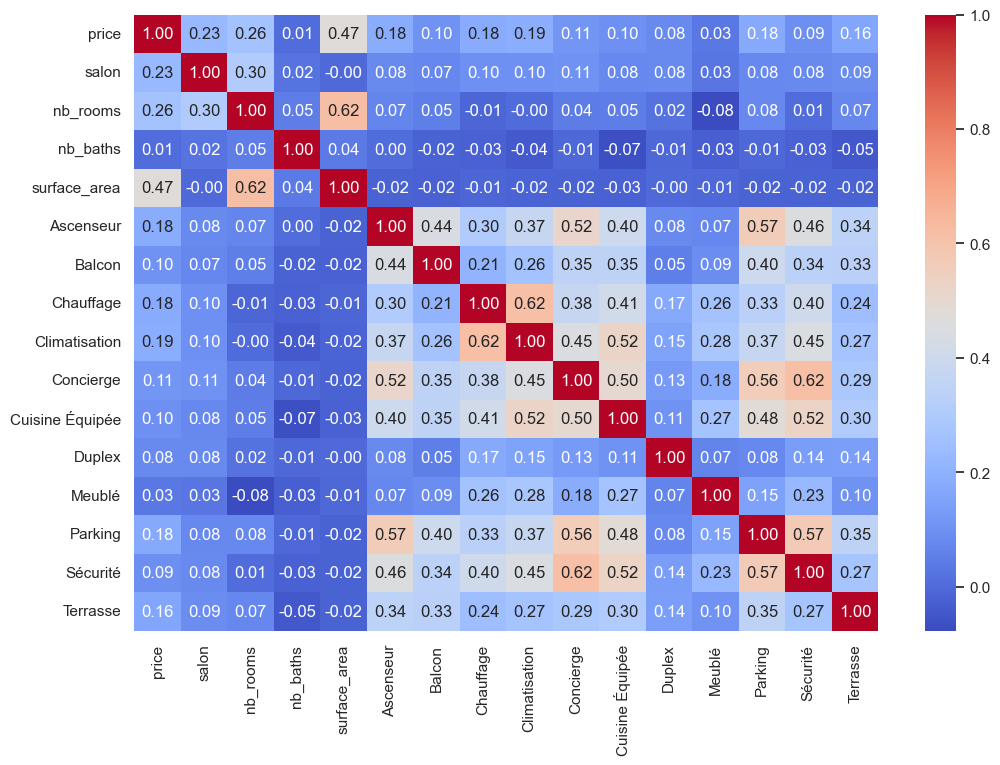

In [13]:
#   Mise en relation des tableaux
df_final = pd.concat([df, dum], axis= 1)
df_final = df_final.drop(columns= "equipment").drop(columns= "link") 
numerical_df = df_final.select_dtypes(include=['number'])
correla = numerical_df.corr()
correla
plt.figure(figsize=(12, 8))
sns.heatmap(correla, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [14]:
#   Le type de la colonne price a deja ete traitee un peu plus haut
#   Creation d'un nouveau dataSet sur lequel travailler avec les colonnes plus ou moins essentielles
df_new = df[["title", "price", "city_name", "salon", "nb_rooms", "nb_baths", "surface_area"]].copy()
df_new

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area
0,CMN-MA-1752 - Appartement à vendre à Palmier,2000000.0,Casablanca,NaN,2.0,2.0,168.0
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1195000.0,Casablanca,NaN,2.0,2.0,98.0
2,Appartement à vendre 81 m² à Dar Bouazza,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900000.0,Casablanca,NaN,1.0,1.0,56.0
4,Appartement à Rabat Agdal,3100000.0,Rabat,2.0,3.0,2.0,200.0
...,...,...,...,...,...,...,...
1768,Appartement à vendre 62 m² à Agadir,NaN,Agadir,1.0,NaN,NaN,62.0
1769,Appartement 110 m² à Agadir,NaN,Agadir,2.0,NaN,NaN,110.0
1770,Appartement à vendre 12000 m² à Temara,NaN,Temara,2.0,NaN,NaN,12000.0
1771,appartement de 84 m² à vendre,700000.0,Casablanca,1.0,2.0,2.0,84.0


In [15]:
#   Traitement de la colonne city_name. Uniformiser les noms de villes : convertir les noms en arabe vers leur équivalent français.
    

## 🔍 Analyse exploratoire des données (EDA)

In [16]:
#   Gestion des valeurs manquantes
valeur_num = ["price",  "salon", "nb_rooms", "nb_baths", "surface_area"]
valeur_obj = ["title", "city_name"]

for i in valeur_num:
    df_new[i] = df_new[i].fillna(df_new[i].median())

for i in valeur_obj:
    df_new[i] = df_new[i].replace("","Unknown")

print("-----------------------------------------------------------------------------------")
df_new.describe()

-----------------------------------------------------------------------------------


,price,salon,nb_rooms,nb_baths,surface_area
count,1.773000e+03,1773.000000,1773.000000,1773.000000,1773.000000
mean,1.128079e+06,1.244219,2.318669,2.256627,173.430908
std,1.167345e+06,0.538188,0.627147,6.970845,2943.432895
min,3.500000e+01,0.000000,1.000000,0.000000,1.000000
25%,6.500000e+05,1.000000,2.000000,1.000000,72.000000
50%,8.800000e+05,1.000000,2.000000,2.000000,89.000000
75%,1.280000e+06,1.000000,3.000000,2.000000,114.000000
max,2.400000e+07,8.000000,7.000000,134.000000,123456.000000


In [17]:
#   Fonction pour determiner les outliers grace au IQR
def detect_outlier_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < low) | (data[column] > upper)]


# Fonction pour determiner les outliers grace au z_score
def detect_outlier_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_score = np.abs((data[column] - mean) / std)
    return data[z_score > threshold]

outliers_IQR = set()
outliers_zscore = set()

# Application : détecter les outliers dans les differentes colonnes
outlier_price_IQR = detect_outlier_IQR(data=df_new, column="price")
outliers_IQR.update(outlier_price_IQR.index)

outlier_salon_IQR = detect_outlier_IQR(data=df_new, column="salon")
outliers_IQR.update(outlier_salon_IQR.index)

outlier_nb_rooms_IQR = detect_outlier_IQR(data=df_new, column="nb_rooms")
outliers_IQR.update(outlier_nb_rooms_IQR.index)

outlier_nb_baths_IQR = detect_outlier_IQR(data=df_new, column="nb_baths")
outliers_IQR.update(outlier_nb_baths_IQR.index)

outlier_surface_area_IQR = detect_outlier_IQR(data=df_new, column="surface_area")
outliers_IQR.update(outlier_surface_area_IQR.index)

print("-----------------------------------------------------------------------------------------")

outlier_price_zscore = detect_outlier_zscore(data=df_new, column="price")
outliers_zscore.update(outlier_price_zscore.index)

outlier_salon_zscore = detect_outlier_zscore(data=df_new, column="salon")
outliers_zscore.update(outlier_salon_zscore.index)

outlier_nb_rooms_zscore = detect_outlier_zscore(data=df_new, column="nb_rooms")
outliers_zscore.update(outlier_nb_rooms_zscore.index)

outlier_nb_baths_zscore = detect_outlier_zscore(data=df_new, column="nb_baths")
outliers_zscore.update(outlier_nb_baths_zscore.index)

outlier_surface_area_zscore = detect_outlier_zscore(data=df_new, column="surface_area")
outliers_zscore.update(outlier_surface_area_zscore.index)

print(f"IQR ={len(outliers_IQR)}")
print(f"ZSCORE ={len(outliers_zscore)}")


-----------------------------------------------------------------------------------------
IQR =520
ZSCORE =69


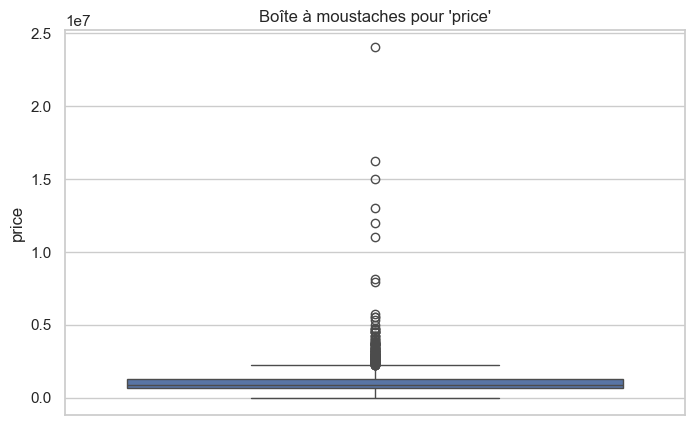

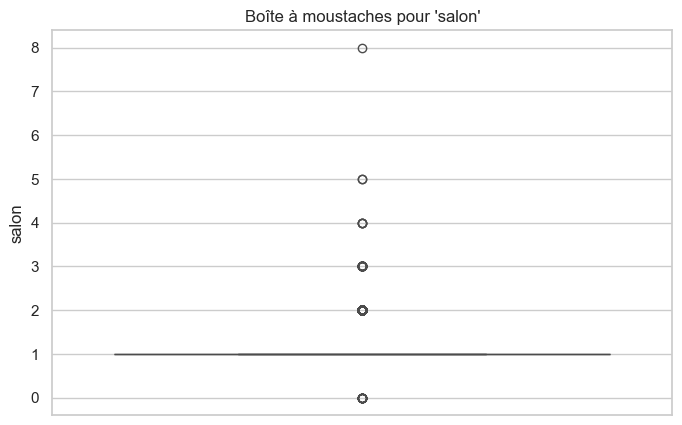

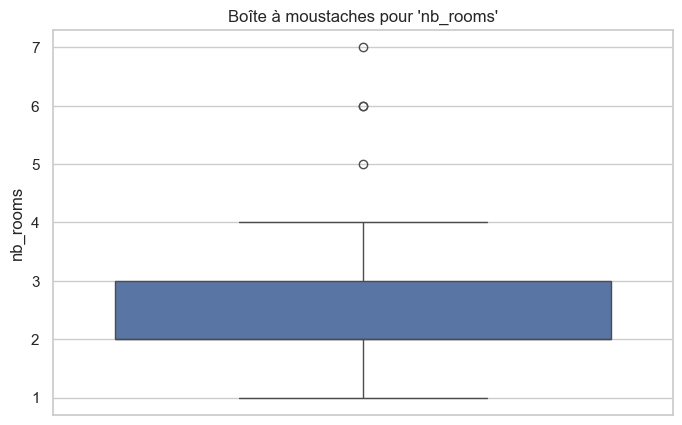

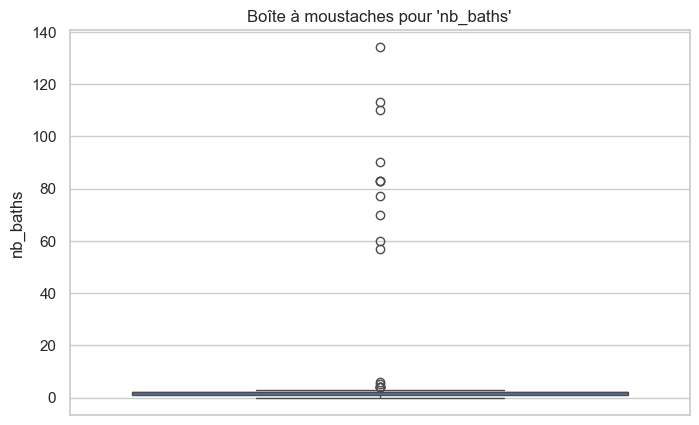

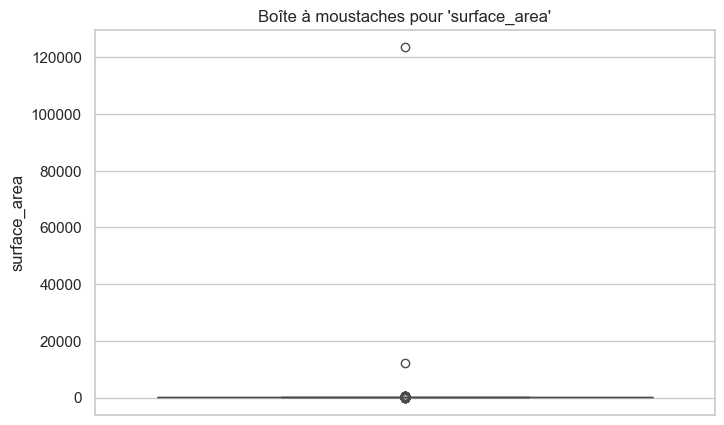

In [18]:
cols = df_new.select_dtypes(include='number').columns
for i, col in enumerate(cols):
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_new[col])
    plt.title(f"Boîte à moustaches pour '{col}'")
    plt.ylabel(col)
    plt.show()

Apres constat on se rend compte que les valeurs aberantes sont comprises entre 10000 et les valeurs superieur au threold nous allonsdonc nous en debarasser

## 🔍 Analyse exploratoire des données (EDA)

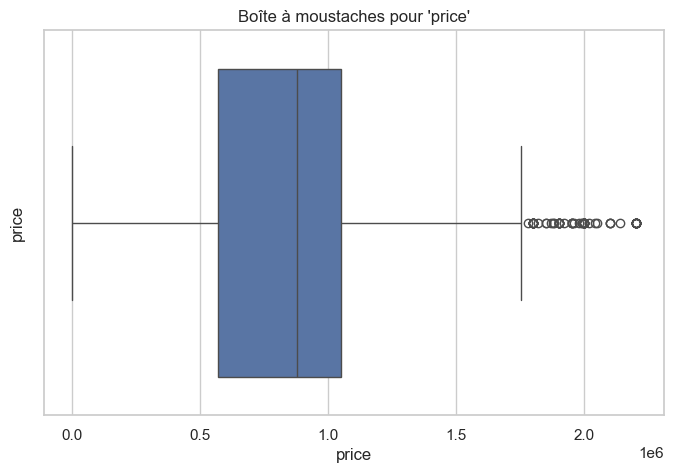

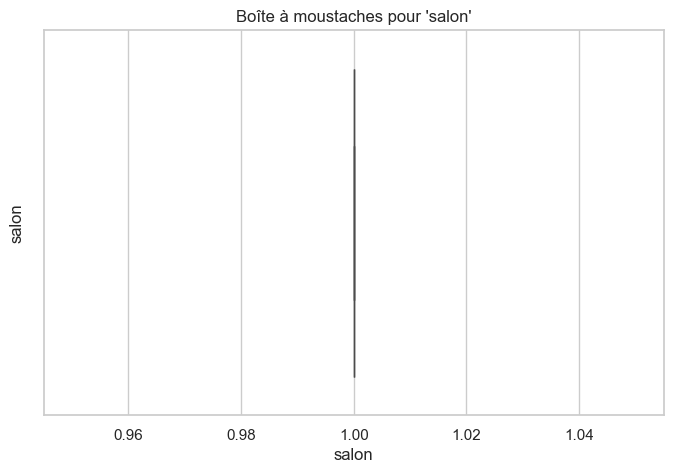

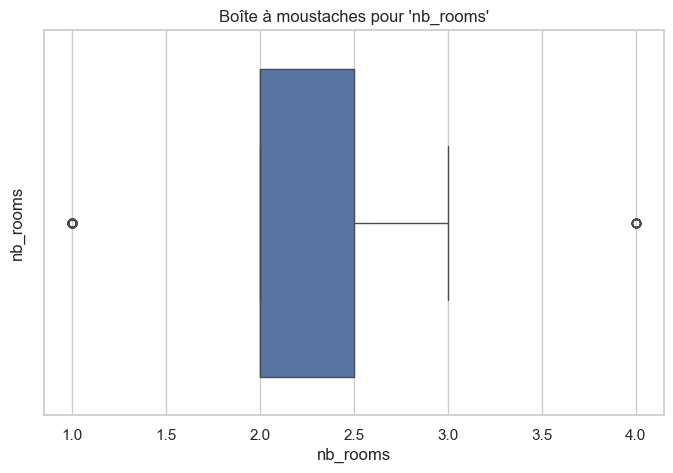

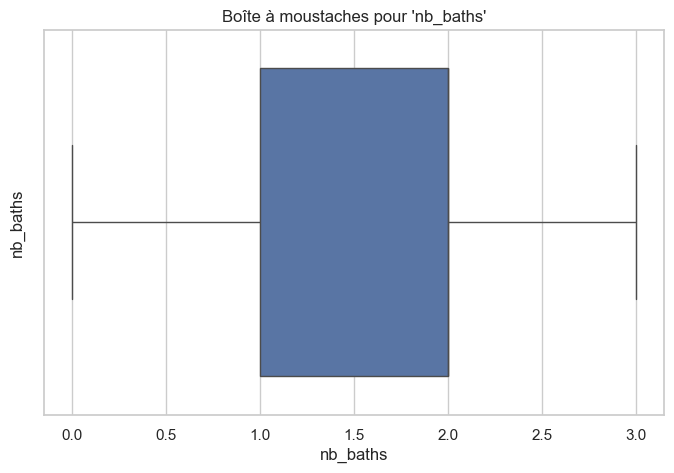

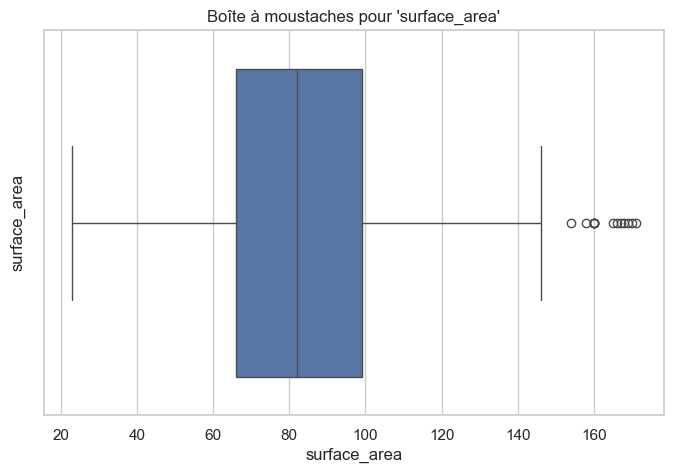

,price,salon,nb_rooms,nb_baths,surface_area
count,1.227000e+03,1227.0,1227.000000,1227.000000,1227.000000
mean,8.684345e+05,1.0,2.207009,1.599837,84.279544
std,4.402099e+05,0.0,0.544451,0.523914,24.605884
min,3.500000e+01,1.0,1.000000,0.000000,23.000000
25%,5.700000e+05,1.0,2.000000,1.000000,66.000000
50%,8.800000e+05,1.0,2.000000,2.000000,82.000000
75%,1.050000e+06,1.0,2.500000,2.000000,99.000000
max,2.200000e+06,1.0,4.000000,3.000000,171.000000


In [19]:

#   Suppression des Outlier
df_cleaned = df_new.copy()
ind = set()
ind.update(
#                df_new[df_new["price"] > 2000000].index, 
#                df_new[df_new["salon"] > 2].index, 
#                df_new[df_new["nb_rooms"] >= 5].index, 
                 df_new[df_new["nb_baths"] > 8].index) 
#                df_new[df_new["surface_area"] > 250].index,
#                df_new[df_new["price"] < 10000].index, 
#                df_new[df_new["nb_baths"] < 1].index, 
#                df_new[df_new["surface_area"] <= 10].index)
df_cleaned = df_cleaned.drop(index=outliers_IQR, axis=0, errors= "ignore")
#df_cleaned = df_cleaned.drop(index = ind, axis=0)
#df_cleaned = df_cleaned.drop(index=outliers_zscore, axis=0, errors= "ignore")


df_cleaned = df_cleaned.drop(index= doublons.index, axis=0, errors= "ignore")

cols = df_cleaned.select_dtypes(include='number').columns
for i, col in enumerate(cols): 
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boîte à moustaches pour '{col}'")
    plt.ylabel(col)
    plt.show()

df_cleaned.describe()




## 🔍 Analyse exploratoire des données (EDA)

In [20]:

# df_cleaned.drop(columns= "title", axis= 1, inplace= True)
# df_cleaned.drop(columns= "city_name", axis= 1, inplace= True)
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1768
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1226 non-null   object 
 1   price         1227 non-null   float64
 2   city_name     1226 non-null   object 
 3   salon         1227 non-null   float64
 4   nb_rooms      1227 non-null   float64
 5   nb_baths      1227 non-null   float64
 6   surface_area  1227 non-null   float64
dtypes: float64(5), object(2)
memory usage: 76.7+ KB


## 🔍 Analyse exploratoire des données (EDA)

In [21]:

df_cleaned.describe()

,price,salon,nb_rooms,nb_baths,surface_area
count,1.227000e+03,1227.0,1227.000000,1227.000000,1227.000000
mean,8.684345e+05,1.0,2.207009,1.599837,84.279544
std,4.402099e+05,0.0,0.544451,0.523914,24.605884
min,3.500000e+01,1.0,1.000000,0.000000,23.000000
25%,5.700000e+05,1.0,2.000000,1.000000,66.000000
50%,8.800000e+05,1.0,2.000000,2.000000,82.000000
75%,1.050000e+06,1.0,2.500000,2.000000,99.000000
max,2.200000e+06,1.0,4.000000,3.000000,171.000000


## 🧾 Chargement des données

In [22]:
# Extraire valeurs uniques
unique_cities = df_new['city_name'].unique()

# Traduire chaque ville une seule fois
translator = GoogleTranslator(source='ar', target='fr')
translation_dict = {}
for city in unique_cities:
    try:
        translation_dict[city] = translator.translate(city)
    except Exception:
        translation_dict[city] = city  # en cas d'erreur, garder original

# Remplacer dans la colonne grâce au mapping
df_new['city_name'] = df_new['city_name'].map(translation_dict)

#   Encodage de la colonne city_name
ohe = OneHotEncoder(sparse_output =False)
encoded_array = ohe.fit_transform(df_new[["city_name"]])

#   Recuperation des differentes des nom de colonnes dans une liste
colonne = ohe.get_feature_names_out(["city_name"])

#   Creation du dataFrame encode
encoded_df = pd.DataFrame(encoded_array, columns= colonne)
df_new = df_new.drop(columns= "city_name", axis= 1).drop(columns= "title", axis= 1)

#   Concatenation
new_df = pd.concat([df_new, encoded_df], axis= 1)
new_df.head()

,price,salon,nb_rooms,nb_baths,surface_area,city_name_Agadir,city_name_Agadir Meloul,city_name_Ain aouda,city_name_Ain attig,city_name_Asilah,...,city_name_Taghazout,city_name_Tamaris,city_name_Tamesna,city_name_Taounide,city_name_Taza,city_name_Temara,city_name_Tiznit,city_name_Tétouan,city_name_Vente,city_name_nan
0,2000000.0,1.0,2.0,2.0,168.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1195000.0,1.0,2.0,2.0,98.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1350000.0,1.0,2.0,2.0,81.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,900000.0,1.0,1.0,1.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3100000.0,2.0,3.0,2.0,200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_cleaned = df_cleaned.drop(columns= "title", axis= 1)
df_cleaned = df_cleaned.drop(columns= "city_name", axis= 1)
df_cleaned = pd.concat([df_cleaned, dum], axis= 1)
df_cleaned = pd.concat([df_cleaned, encoded_df], axis= 1)
print(df_cleaned.dtypes)

price                float64
salon                float64
nb_rooms             float64
nb_baths             float64
surface_area         float64
                      ...   
city_name_Temara     float64
city_name_Tiznit     float64
city_name_Tétouan    float64
city_name_Vente      float64
city_name_nan        float64
Length: 91, dtype: object


## ⚖️ Mise à l’échelle des données

In [24]:
# scaler_minmax = MinMaxScaler()
# df_minmax = new_df["price"].copy()
# df_minmax = scaler_minmax.fit_transform(new_df[["price"]])
# print(df_minmax)
# scaler = StandardScaler()
# scaled = scaler.fit_transform(df_cleaned)
# scaled

In [25]:
# Calcule la corrélation avec la variable 'price'
correlation_price = df_cleaned.corr()['price'].sort_values(ascending=False)

# Affiche les variables corrélées au prix avec un seuil de 0.15
variables_utiles = correlation_price[abs(correlation_price) > 0.15].drop('price')

print("Variables corrélées au prix :")
print(variables_utiles)

Variables corrélées au prix :
surface_area     0.469028
Ascenseur        0.317155
nb_baths         0.290835
nb_rooms         0.200355
Parking          0.192012
Climatisation    0.189691
Terrasse         0.175673
Concierge        0.168592
Name: price, dtype: float64


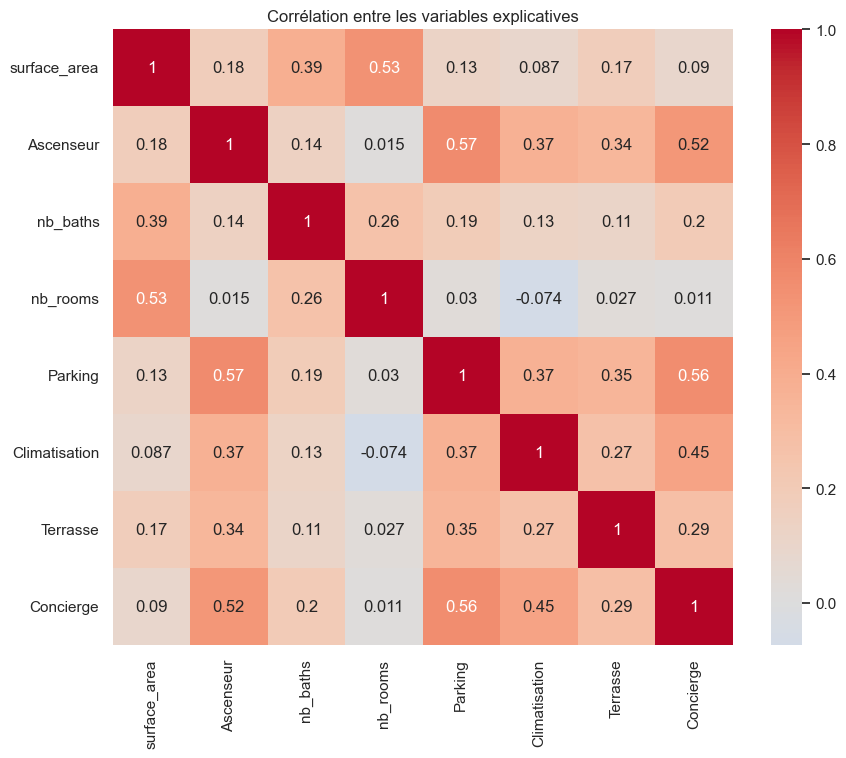

In [26]:
df_corr = df_cleaned[variables_utiles.index].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Corrélation entre les variables explicatives")
plt.show()

## 🔍 Analyse exploratoire des données (EDA)

In [27]:
#   Separation des donnees

df_cleaned = df_cleaned.dropna()
y = df_cleaned["price"]
X = df_cleaned[variables_utiles.index]
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1768
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   price                             1227 non-null   float64
 1   salon                             1227 non-null   float64
 2   nb_rooms                          1227 non-null   float64
 3   nb_baths                          1227 non-null   float64
 4   surface_area                      1227 non-null   float64
 5   Ascenseur                         1227 non-null   int64  
 6   Balcon                            1227 non-null   int64  
 7   Chauffage                         1227 non-null   int64  
 8   Climatisation                     1227 non-null   int64  
 9   Concierge                         1227 non-null   int64  
 10  Cuisine Équipée                   1227 non-null   int64  
 11  Duplex                            1227 non-null   int64  
 12  Meublé     

## ✂️ Séparation en données d'entraînement et de test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Taille X_train :", X_train.shape)
print("Taille X_test  :", X_test.shape)
print("Taille y_train :", y_train.shape)
print("Taille y_test  :", y_test.shape)


Taille X_train : (981, 8)
Taille X_test  : (246, 8)
Taille y_train : (981,)
Taille y_test  : (246,)


## 🤖 Entraînement de plusieurs modèles de régression

In [29]:
models_params = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}  # pas d'hyperparamètres à tuner
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10],
            "epsilon": [0.01, 0.1, 1],
            "kernel": ['rbf', 'linear']
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    }
}


## 🔁 Validation croisée

In [30]:
results = []

for name, config in models_params.items():
    print(f"\n🔍 Modèle : {name}")

    model = config["model"]
    param_grid = config["params"]

    # Optimisation des hyperparamètres
    if param_grid:
        search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
        search.fit(X_train_scaled, y_train)
        best_model = search.best_estimator_
        print("✅ Meilleurs paramètres :", search.best_params_)
    else:
        # Pas d'optimisation pour la régression linéaire
        best_model = model
        best_model.fit(X_train_scaled, y_train)

    # Validation croisée sur l'entraînement
    cv_rmse = -cross_val_score(best_model, X_train_scaled, y_train, cv=5,
                               scoring='neg_root_mean_squared_error').mean()
    cv_r2 = cross_val_score(best_model, X_train_scaled, y_train, cv=5,
                            scoring='r2').mean()

    # Réentraînement sur tout le train
    best_model.fit(X_train_scaled, y_train)

    # Prédiction sur le test
    y_pred = best_model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Résumé
    print(f"📊 CV RMSE: {cv_rmse:.2f} | CV R²: {cv_r2:.4f}")
    print(f"🧪 Test RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.4f}")

    results.append({
        "Modèle": name,
        "CV RMSE": cv_rmse,
        "CV R²": cv_r2,
        "Test RMSE": rmse,
        "Test MAE": mae,
        "Test R²": r2
    })



🔍 Modèle : Linear Regression
📊 CV RMSE: 371939.00 | CV R²: 0.2829
🧪 Test RMSE: 374701.60 | MAE: 280398.27 | R²: 0.2621

🔍 Modèle : Random Forest
✅ Meilleurs paramètres : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
📊 CV RMSE: 384668.10 | CV R²: 0.2334
🧪 Test RMSE: 366164.36 | MAE: 259733.69 | R²: 0.2953

🔍 Modèle : SVR
✅ Meilleurs paramètres : {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
📊 CV RMSE: 437299.06 | CV R²: 0.0113
🧪 Test RMSE: 432908.86 | MAE: 313716.17 | R²: 0.0150

🔍 Modèle : Gradient Boosting
✅ Meilleurs paramètres : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
📊 CV RMSE: 369921.93 | CV R²: 0.2900
🧪 Test RMSE: 372062.40 | MAE: 262919.72 | R²: 0.2724


In [31]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Test R²", ascending=False)
print("\n📈 Comparaison finale des modèles :\n")
print(results_df)



📈 Comparaison finale des modèles :

              Modèle        CV RMSE     CV R²      Test RMSE       Test MAE  \
1      Random Forest  384668.096900  0.233355  366164.360894  259733.688540   
3  Gradient Boosting  369921.928184  0.289956  372062.399780  262919.718686   
0  Linear Regression  371938.995686  0.282868  374701.595787  280398.268036   
2                SVR  437299.061286  0.011291  432908.860052  313716.166716   

    Test R²  
1  0.295304  
3  0.272419  
0  0.262060  
2  0.014985  


## 🤖 Entraînement de plusieurs modèles de régression

In [33]:
# Meilleur modèle selon le R² sur les données test
best_model_name = results_df.iloc[0]["Modèle"]
print(f"\n🏆 Meilleur modèle : {best_model_name}")

# Récupération du modèle correspondant
if best_model_name == "Linear Regression":
    final_model = LinearRegression().fit(X_train_scaled, y_train)
elif best_model_name == "Random Forest":
    final_model = GridSearchCV(models_params["Random Forest"]["model"],
                               models_params["Random Forest"]["params"],
                               cv=5, scoring='neg_root_mean_squared_error')
    final_model.fit(X_train_scaled, y_train)
    final_model = final_model.best_estimator_
elif best_model_name == "SVR":
    final_model = RandomizedSearchCV(models_params["SVR"]["model"],
                                     models_params["SVR"]["params"],
                                     cv=5, n_iter=10,
                                     scoring='neg_root_mean_squared_error',
                                     random_state=42)
    final_model.fit(X_train_scaled, y_train)
    final_model = final_model.best_estimator_
elif best_model_name == "Gradient Boosting":
    final_model = GridSearchCV(models_params["Gradient Boosting"]["model"],
                               models_params["Gradient Boosting"]["params"],
                               cv=5, scoring='neg_root_mean_squared_error')
    final_model.fit(X_train_scaled, y_train)
    final_model = final_model.best_estimator_

# 💾 Sauvegarde du modèle entraîné
joblib.dump(final_model, "model.pkl")
print("✅ Modèle sauvegardé sous le nom 'model.pkl'")


🏆 Meilleur modèle : Random Forest
✅ Modèle sauvegardé sous le nom 'model.pkl'


## ✅ Conclusion

Le meilleur modèle a été sélectionné selon le score R² et sauvegardé sous le nom `model.pkl`. Ce projet peut être intégré à une API ou déployé dans une application.